# Dynamika punktu materialnego w 1D

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)


## Zadanie 1

In [ ]:
m = 1 # [kg]
v_0 = 0
E = -0.6 # [J]

# Potencjał

def V(x):
    return -(np.exp(-x**2))-1.2*(np.exp(-(x-2)**2))

# funkcja

def f(x):
    return V(x)-E

x=np.linspace(2,4,100)

In [ ]:
def bis(f,x,a,b,accuracy=0.000001):
    m_p = []
    for i in range(0,len(x)):
        m = (a+b)/2
        m_p.append(m)
        if np.abs(a-b)<accuracy:
            break
        else:
            if f(a)*f(m)<0:
                b=m
            if f(b)*f(m)<0:
                a=m
    print("Miejsce zerowe: {:.5f}".format(m))
    plt.plot(m_p,label="zbieżność")
    plt.xlabel("liczba iteracji")
    plt.ylabel("Miejsce zerowe")
    plt.legend()
    plt.grid(True)
    plt.show()

Miejsce zerowe: -0.71560


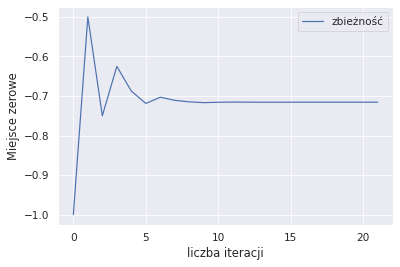

In [ ]:
bis(f,x,-2,0)

Miejsce zerowe: 2.83288


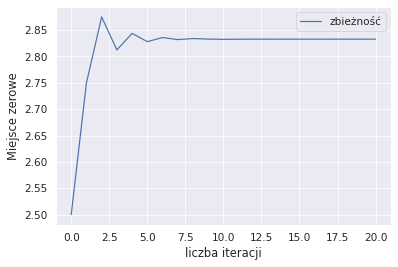

In [ ]:
m_p = bis(f,x,3,2)

In [ ]:
def diff(f,x,h=0.5):
    return ((f(x+h)-f(x-h))/(2*h))

In [ ]:
def NewRaps(f,x,a,eps=0.0001):
    xp=[]
    x0=a
    for i in range(0,len(x)):
        x01 = x0
        x0=x01-f(x01)/diff(f,x01)
        xp.append(x0)
        if abs(x0 - x01) < eps:
            break
        
    print("Miejsce zerowe: {:.5f}".format(x0))
    plt.plot(xp,label="zbieżność")
    plt.xlabel("liczba iteracji")
    plt.ylabel("Miejsce zerowe")
    plt.legend()
    plt.grid(True)
    plt.show()


Miejsce zerowe: -0.71561


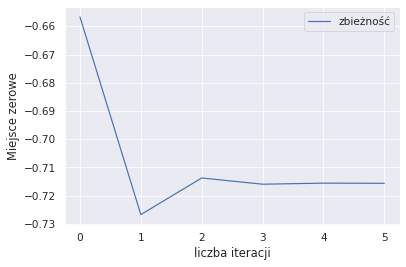

In [ ]:
NewRaps(f,x,-1)

Miejsce zerowe: 2.83287


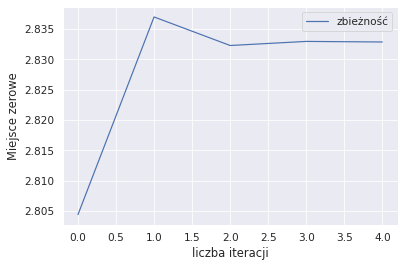

In [ ]:
NewRaps(f,x,3)

In [ ]:
x0=2.83288
v0 = 0
T = 30 # [s]

def diff(x):
    return 2*x*np.exp(-x**2)-1.2*(-2*x+4)*np.exp(-(x-2)**2)

In [ ]:
def euler(t,x0,v0,dt=0.01):
    x_p = []
    v_p = []
    t=np.arange(0,t,dt)
    for i in range(len(t)):
        temp = v0
        v0=temp-1/m*diff(x0)*dt
        x0=x0+temp*dt
        x_p.append(x0)
        v_p.append(v0)
    return x_p,v_p,t

In [ ]:
x_p,v_p,t = euler(T,x0,v0)
x_p2,v_p2,t2 = euler(T,x0,v0,dt=0.001)

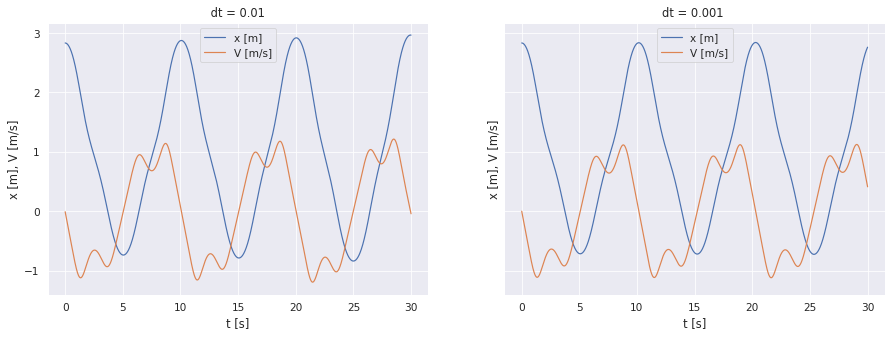

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(t,x_p,t,v_p)

ax0.set(xlabel='t [s]', ylabel='x [m], V [m/s]',
       title=' dt = 0.01 ')

ax0.legend(['x [m]','V [m/s]'])


ax1.plot(t2,x_p2,t2,v_p2)

ax1.set(xlabel='t [s]', ylabel='x [m], V [m/s]',
       title='dt = 0.001 ')

ax1.legend(['x [m]','V [m/s]'])



plt.show()

In [ ]:
Ek_t = [(m*(v**2))/2 for v in v_p]
V_t = [V(x) for x in x_p]
Ek_add_V = [Ek+V for Ek,V in zip(Ek_t,V_t)]

In [ ]:
Ek_t2 = [(m*(v**2))/2 for v in v_p2]
V_t2 = [V(x) for x in x_p2]
Ek_add_V2 = [Ek+V for Ek,V in zip(Ek_t2,V_t2)]

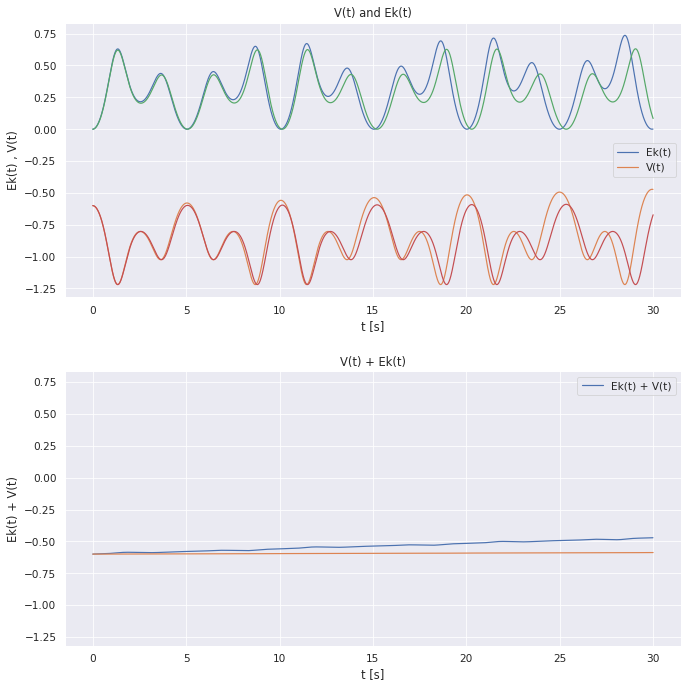

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,sharey=True,figsize=(10,10))

ax1.plot(t,Ek_t,t,V_t,t2,Ek_t2,t2,V_t2)

ax1.set(xlabel='t [s]', ylabel='Ek(t) , V(t)',
       title='V(t) and Ek(t)')

ax1.legend(['Ek(t)','V(t)'])

ax2.plot(t,Ek_add_V,t2,Ek_add_V2)

ax2.set(xlabel='t [s]', ylabel='Ek(t) + V(t)',
       title='V(t) + Ek(t)')

ax2.legend(['Ek(t) + V(t)'])



fig.tight_layout(pad=2.0)

plt.show()

In [ ]:
T_2 = 100 # [s]
dt_2 = 0.01
dt_3 = 0.001

x_p2,v_p2,t2 = euler(T_2,x0,v0,dt_2)
x_p3,v_p3,t3 = euler(T_2,x0,v0,dt_3)



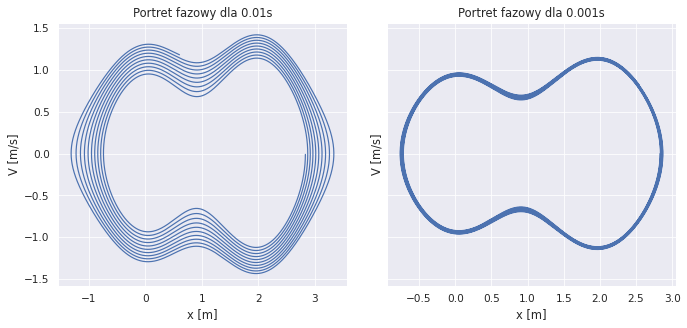

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))

ax1.plot(x_p2,v_p2)

ax1.set(xlabel='x [m]', ylabel='V [m/s]',
       title='Portret fazowy dla 0.01s')


ax2.plot(x_p3,v_p3)

ax2.set(xlabel='x [m]', ylabel='V [m/s]',
       title='Portret fazowy dla 0.001s')


fig.tight_layout(pad=2.0)

plt.show()

# 3

In [ ]:
def v_opr(x,v0,dt,a):
    return v0-(1/m)*diff(x)*dt-a*v0*dt



def euler_opr(v_opr,t,x0,v0,alfa,dt=0.01):
    x_p = []
    v_p = []
    t=np.arange(0,t,dt)
    for i in range(len(t)):
        temp = v0
        v0=v_opr(x0,temp,dt,alfa)
        x0=x0+temp*dt
        x_p.append(x0)
        v_p.append(v0)
    return x_p,v_p,t

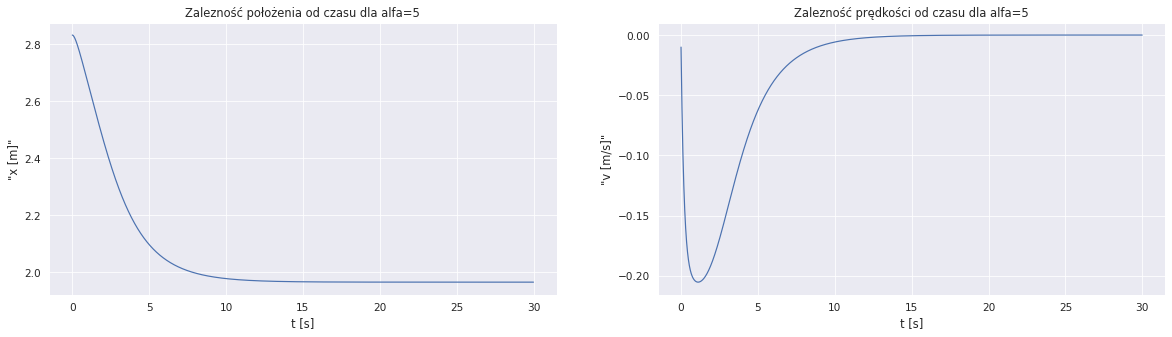

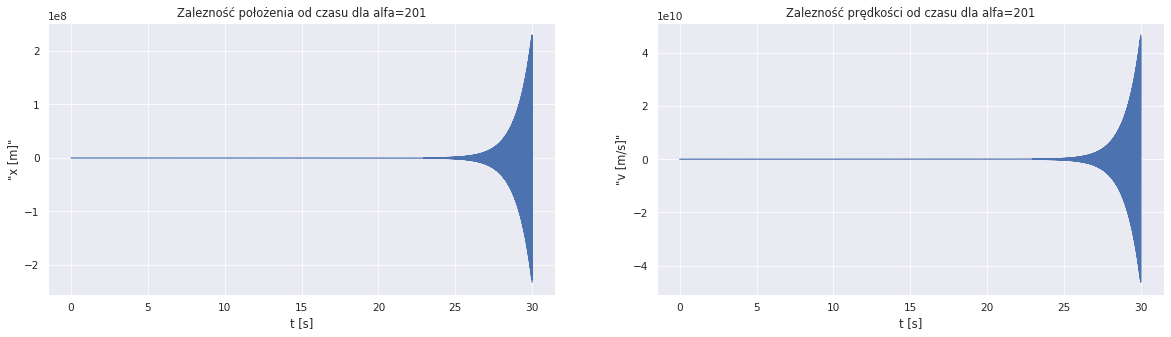

In [ ]:

alfas = [5,201]

for i in alfas:
    x1,v1,t1 = euler_opr(v_opr,T,x0,v0,i,0.01)
    fig, (ax0, ax1)=plt.subplots(ncols=2,figsize=[20,5])
    ax0.plot(t1,x1)
    ax0.set(xlabel="t [s]", ylabel='"x [m]"',
       title='Zalezność położenia od czasu dla alfa='+str(i))
    
    x2,v2,t2 = euler_opr(v_opr,T,x0,v0,i,0.01)
    ax1.plot(t2,v2)
    ax1.set(xlabel="t [s]", ylabel='"v [m/s]"',
       title='Zalezność prędkości od czasu dla alfa='+str(i))
    

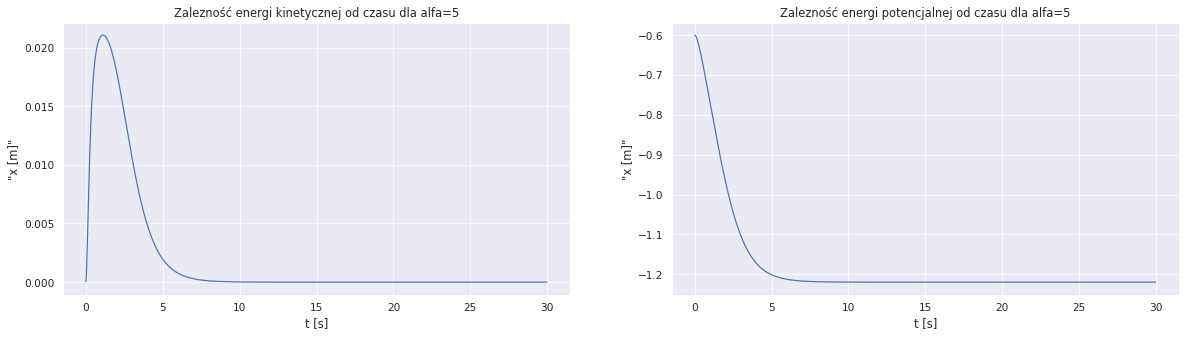

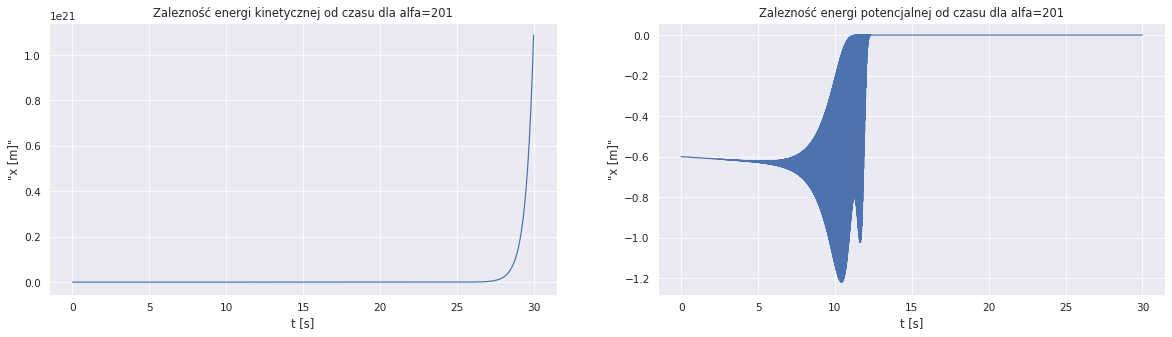

In [ ]:

alfas = [5,201]

for i in alfas:
    x3,v3,t3 = euler_opr(v_opr,T,x0,v0,i,0.01)
    Ek_t = [(m*(v3**2))/2 for v3 in v3]
    V_t = [V(x3) for x3 in x3]
    Ek_add_V = [Ek+V for Ek,V in zip(Ek_t,V_t)]
    fig, (ax0, ax1)=plt.subplots(ncols=2,figsize=[20,5])
    ax0.plot(t3,Ek_t)
    ax0.set(xlabel="t [s]", ylabel='"x [m]"',
       title='Zalezność energi kinetycznej od czasu dla alfa='+str(i))
    
    x4,v4,t4 = euler_opr(v_opr,T,x0,v0,i,0.01)
    ax1.plot(t4,V_t)
    ax1.set(xlabel="t [s]", ylabel='"x [m]"',
       title='Zalezność energi potencjalnej od czasu dla alfa='+str(i))

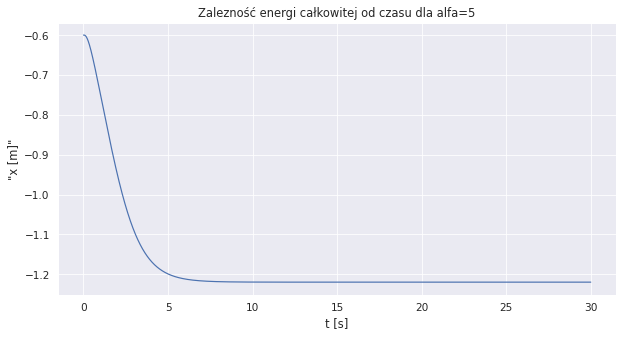

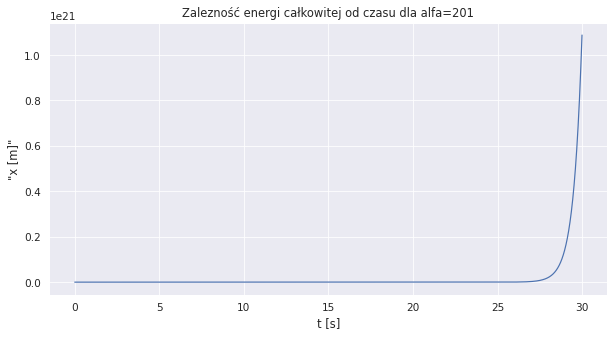

In [ ]:

alfas = [5,201]

for i in alfas:
    x5,v5,t5 = euler_opr(v_opr,T,x0,v0,i,0.01)
    Ek_t = [(m*(v5**2))/2 for v5 in v5]
    V_t = [V(x5) for x5 in x5]
    Ek_add_V = [Ek+V for Ek,V in zip(Ek_t,V_t)]
    fig, ax0=plt.subplots(figsize=[10,5])
    ax0.plot(t,Ek_add_V)
    ax0.set(xlabel="t [s]", ylabel='"x [m]"',
       title='Zalezność energi całkowitej od czasu dla alfa='+str(i))
    

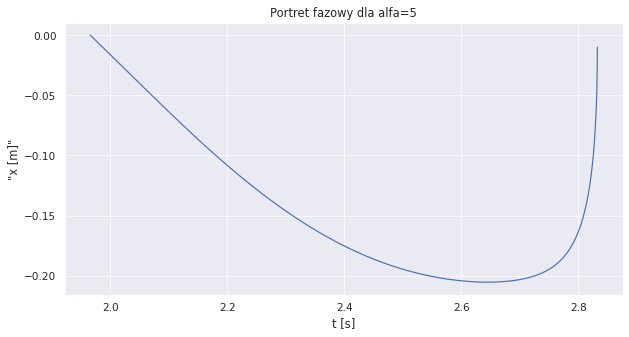

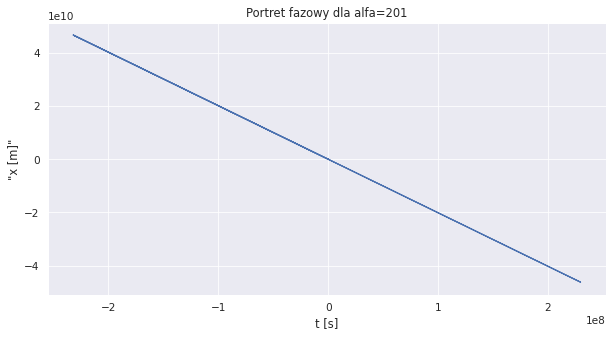

In [ ]:
alfas = [5,201]

for i in alfas:
    x1,v1,t1 = euler_opr(v_opr,T,x0,v0,i,0.01)
    fig, ax0 = plt.subplots(figsize=[10,5])
    ax0.plot(x1,v1)
    ax0.set(xlabel="t [s]", ylabel='"x [m]"',
       title='Portret fazowy dla alfa='+str(i))
    

    

# zadnaie 4

In [ ]:
from scipy import linalg

# Funkcje

def xn(x0,v0,a,dt):
    return x0+dt*(v_opr(x0,v0,dt,a)+v0)/2

def vn(x0,v0,a,dt):
    return v0+dt*(-(1/m)*diff(xn(x0,v0,a,dt))-a*v_opr(x0,v0,dt,a)-(1/m)*diff(x0)-a*v0)/2

def F1(x,v,x0,v0,a,dt):
    return x-x0-(dt/2)*v-(dt/2)*v0

def F2(x,v,x0,v0,a,dt):
    return v-v0-(dt/2)*(-diff(x)/m-a*v_opr(x0, v0, dt, a))-(dt/2)*(-diff(x0)/m-a*v0)

def diff2(f,x,dx=1e-5):
    return (f(x+dx)-2*f(x)+f(x-dx))/(dx**2)


In [ ]:

def trapezy(x0,v0,dt,a):
   
    x_t = []
    v_t = []
    x=x0
    v=v0
    
    for i in range(4):
        A=np.array([[ 1 , -dt/2 ],[ dt/(2*m)*diff2(f,xn(x,v,a,dt)) , 1+dt*a/2 ]])
        B=np.array([-F1(x,v,x0,v0,a,dt),-F2(x,v,x0,v0,a,dt)])
        C=np.linalg.solve(A,B)
        x=x+C[0]
        v=v+C[1]
        
        x0=x
        v0=v
        
        x_t.append(x)
        v_t.append(v)
        

    return (x_t,v_t)

In [ ]:


x6,v6 = trapezy(x0,v0,dt=0.01,a=0)

In [ ]:
A ={'x(t)': x6, 'v(t)': v6}
Series = pd.DataFrame(A)


In [ ]:
Series

,x(t),v(t)
0,2.832830,-0.010008
1,2.832680,-0.020016
2,2.832430,-0.030025
3,2.832079,-0.040036


# Zadanie 5

In [ ]:

dt=0.01
a=0
m=1
def trapezy_f(x0,v0,dt,t,a):
    x_t = []
    v_t = []
    x=x0
    v=v0
    
    for i in t:
        A=np.array([[ 1 , -dt/2 ],[ dt/(2*m)*diff2(f,xn(x,v,a,dt)) , 1+dt*a/2 ]])
        B=np.array([-F1(x,v,x0,v0,a,dt),-F2(x,v,x0,v0,a,dt)])
        C=np.linalg.solve(A,B)
        x=x+C[0]
        v=v+C[1]
        
        x0=x
        v0=v
        
        x_t.append(x)
        v_t.append(v)
        
        

    return (x_t,v_t)

In [ ]:
tr1=np.arange(0,100,0.01)
tr2=np.arange(0,100,0.1)

xf1,vf1 = trapezy_f(x0,v_0,dt,tr1,a)
xf2,vf2 = trapezy_f(x0,v_0,dt,tr2,a)

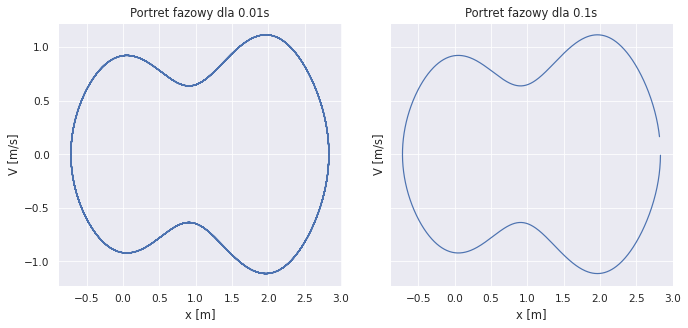

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))

ax1.plot(xf1,vf1)

ax1.set(xlabel='x [m]', ylabel='V [m/s]',
       title='Portret fazowy dla 0.01s')


ax2.plot(xf2,vf2)

ax2.set(xlabel='x [m]', ylabel='V [m/s]',
       title='Portret fazowy dla 0.1s')


fig.tight_layout(pad=2.0)

plt.show()

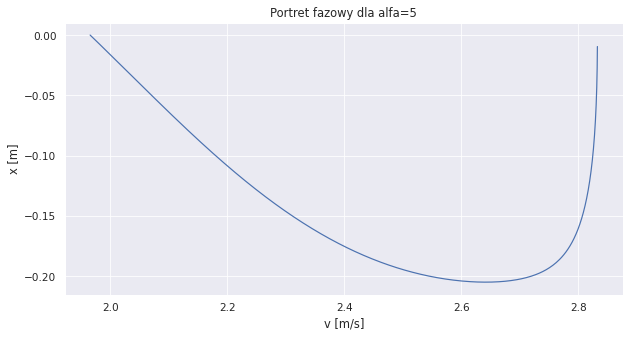

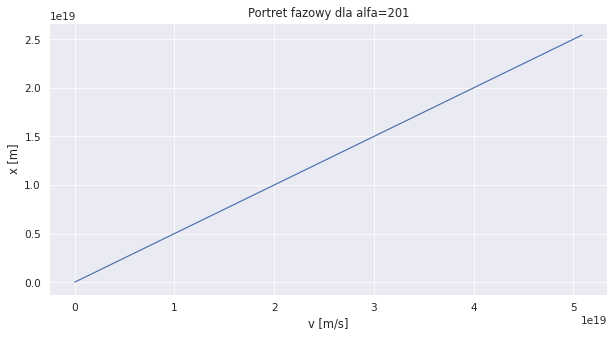

In [ ]:
alfas = [5,201]

for i in alfas:
    x7,v7 = trapezy_f(x0,v_0,dt,tr1,i)
    fig, ax0, =plt.subplots(ncols=1,figsize=[10,5])
    ax0.plot(x7,v7)
    ax0.set(xlabel="v [m/s]", ylabel='x [m]',
       title='Portret fazowy dla alfa='+str(i))

In [ ]:
Ek_t_t = [(m*(vf1**2))/2 for vf1 in vf1]
V_t_t = [V(xf1) for xf1 in xf1]
Ek_add_V_t = [Ek+V for Ek,V in zip(Ek_t_t,V_t_t)]

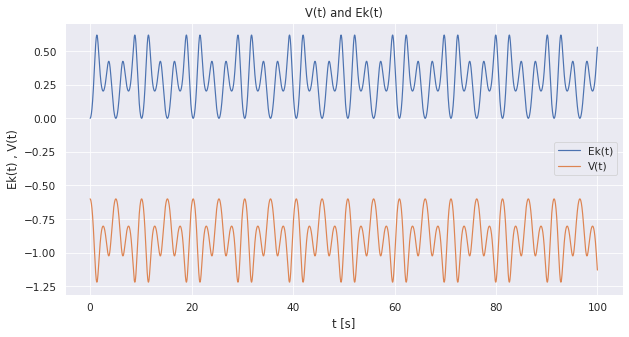

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(tr1,Ek_t_t,tr1,V_t_t)

ax1.set(xlabel='t [s]', ylabel='Ek(t) , V(t)',
       title='V(t) and Ek(t)')

ax1.legend(['Ek(t)','V(t)'])


plt.show()

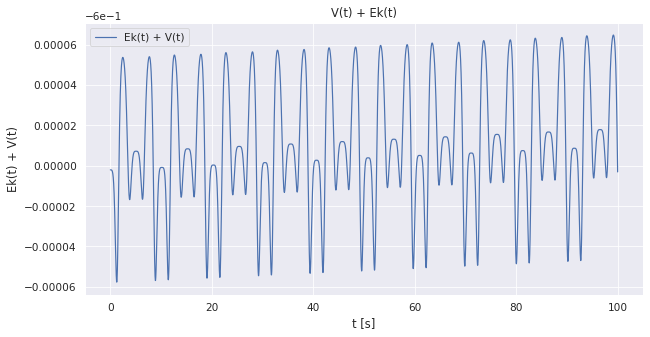

In [ ]:
fig, ax2 = plt.subplots(figsize=(10,5))

ax2.plot(tr1,Ek_add_V_t)

ax2.set(xlabel='t [s]', ylabel='Ek(t) + V(t)',
       title='V(t) + Ek(t)')

ax2.legend(['Ek(t) + V(t)'])


plt.show()

[Text(0, 0.5, 'v [m/s]'),
 Text(0.5, 0, 't [s]'),
 Text(0.5, 1.0, 'Zalezność prędkości od czasu ')]

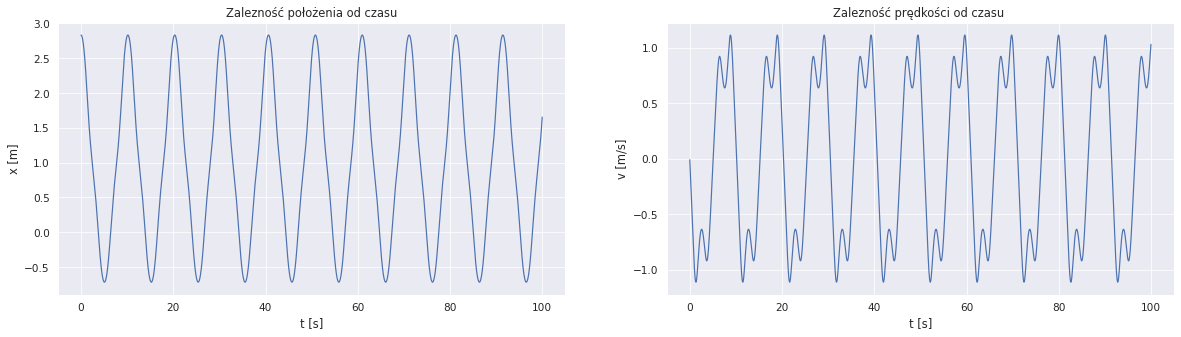

In [ ]:


fig, (ax0, ax1)=plt.subplots(ncols=2,figsize=[20,5])
ax0.plot(tr1,xf1)    
ax0.set(xlabel="t [s]", ylabel='x [m]',
       title='Zalezność położenia od czasu')

ax1.plot(tr1,vf1)
ax1.set(xlabel="t [s]", ylabel='v [m/s]',
       title='Zalezność prędkości od czasu ')
    